# Import the needed libraries

In [4]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import the files to be analyzed

### In my case, I had one .csv file. The column names were the questions, and the values were the answers, given by a likert scale from 1 to 7.


In [5]:
address="C:/Users/chris/Desktop/Estudos/Mestrado/Estudo_Medo/Dados_Experimento_Medo_V1.csv"

dts_medo = pd.read_csv(address)

### As the column names were too big, I needed to change this. So I created a table with new names, renamed the columns

In [6]:
endereco_cabecalho="C:/Users/chris/Desktop/Estudos/Mestrado/Estudo_Medo/Dados_Experimento_Medo_V1_de_para_cabecalho.csv"
dts_medo_cabecalho = pd.read_csv(endereco_cabecalho,header=None)
dts_medo = dts_medo.set_axis(dts_medo_cabecalho.iloc[0], axis=1, inplace=False)


### and in order to analyse clusters, I created a subset with intention (intenção in Portuguese) and Anxiety (ansiedade in Portuguese)

In [7]:
dts_medo_int_ans=pd.concat([
    dts_medo.questionario_tipo,
    (dts_medo.intencao_01+dts_medo.intencao_02+dts_medo.intencao_03+dts_medo.intencao_04+dts_medo.intencao_05)/5,
    (dts_medo.ansiedade_01+dts_medo.ansiedade_02+dts_medo.ansiedade_03+dts_medo.ansiedade_04+dts_medo.ansiedade_05+dts_medo.ansiedade_06)/6,
                           ],
 axis=1,ignore_index=True)

#nomeando as colunas da nova tabela
dts_medo_int_ans.columns=['questionario_tipo','intencao','ansiedade']

# Graphics

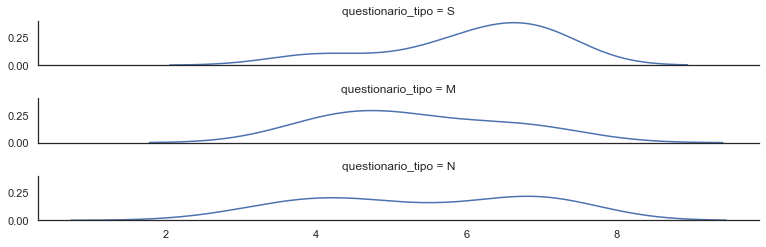

In [8]:
sns.set_theme(style="white")
g = sns.FacetGrid(dts_medo_int_ans, row="questionario_tipo",aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="intencao")

Text(0.5, 0.98, 'teste')

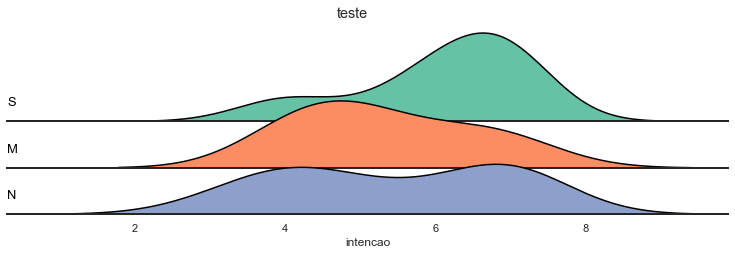

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0),
'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(dts_medo_int_ans, palette=palette, row="questionario_tipo",
hue="questionario_tipo", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="intencao", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="intencao", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)
g.map(label, "questionario_tipo")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="intencao")
g.despine( left=True)
plt.suptitle('teste', y=0.98)

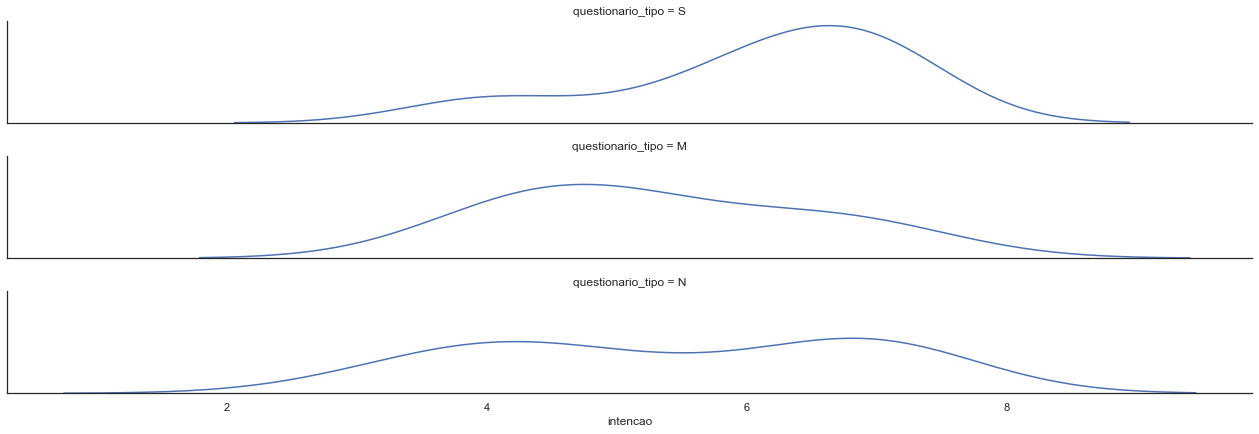

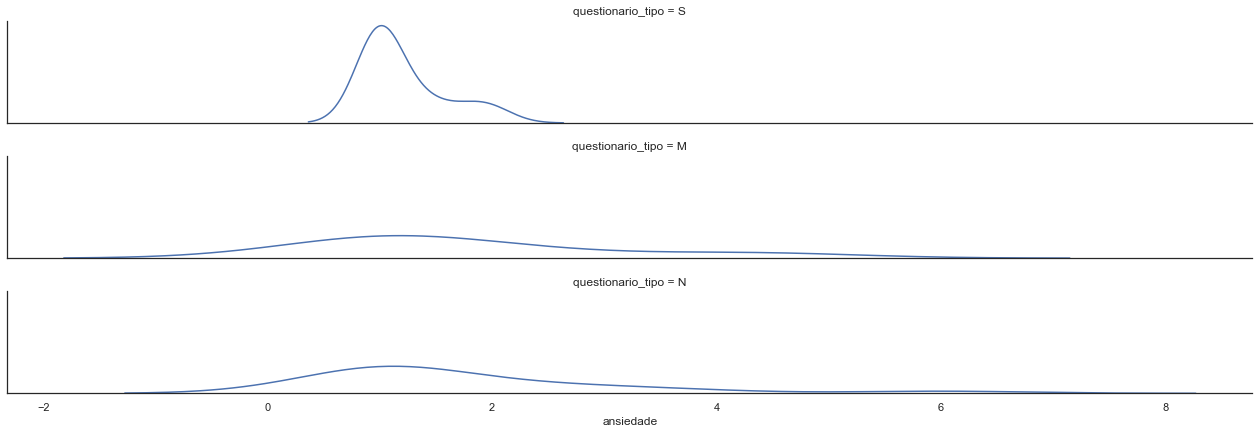

In [11]:
sns.set_theme(style="white")
g = sns.FacetGrid(dts_medo_int_ans, row="questionario_tipo",aspect=9, height=2)
g.map_dataframe(sns.kdeplot, x="intencao")
g.set(yticks=[], xlabel="intencao")
g = sns.FacetGrid(dts_medo_int_ans, row="questionario_tipo",aspect=9, height=2)
g.map_dataframe(sns.kdeplot, x="ansiedade")
g.set(yticks=[], xlabel="ansiedade")